In [2]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image # for image processing and loading
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset 
from torchvision.utils import save_image
import matplotlib.pyplot as plt 
import torchvision.transforms as transforms


In [3]:
torch.manual_seed(777)
IMAGE_SIZE = 128 # 훈련 시키려면 이미지 크기를 통일 시켜야함. 128x128로 통일

device='cuda' if torch.cuda.is_available() else 'cpu'
if device=='cuda':
    torch.cude.manual_seed_all(777)

In [4]:
# 이미지를 불러오는 함수

original_datasets=ImageFolder(root='fruit_photos/', 
                                transform=transforms.Compose([
                                transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                transforms.ToTensor()]))

In [5]:
print(original_datasets)

Dataset ImageFolder
    Number of datapoints: 2301
    Root location: fruit_photos/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [6]:
# 데이터 로더 생성

original_loader=DataLoader(original_datasets, 
                            batch_size=2301, # 데이터셋의 크기 -> 이미지 한번에 다 불러옴 
                            shuffle=True,
                            drop_last=False,
                            num_workers=1)

In [7]:
# 데이터셋 확인

for X, Y in original_loader:
    print(X.size(), Y.size())
    break

torch.Size([2301, 3, 128, 128]) torch.Size([2301])


In [8]:
# 이미지 확인 

original_images, labels = next(iter(original_loader)) # 이미지와 라벨을 가져옴
print(original_images.shape)
print(labels.shape)

torch.Size([2301, 3, 128, 128])
torch.Size([2301])


In [9]:
# 10개의 이미지를 확인

print(labels[:10])

tensor([3, 8, 0, 1, 5, 5, 0, 9, 4, 1])


In [10]:
# 중복된 라이브러리 로드로 인한 충돌을 방지
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

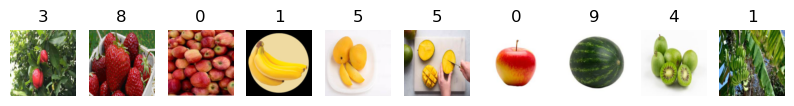

In [11]:
plt.figure(figsize=(10,10)) # 이미지 사이즈 설정
for i in range(10):
    plt.subplot(1,10,i+1) # 1행 10열로 나누고 i+1번째에 그림
    plt.title(labels[i].item()) # 라벨을 제목으로 설정
    plt.imshow(original_images[i].permute(1,2,0)) # 이미지를 출력
    plt.axis('off') # 축을 꺼줌
plt.show()

In [12]:
X1=original_images # 원본 이미지
Y1=labels # 원본 라벨
print(X1.size(), Y1.size()) # 이미지와 라벨의 크기

torch.Size([2301, 3, 128, 128]) torch.Size([2301])


In [13]:
# 이미지 증강 함수 정의 -> 이미지를 랜덤으로 변형시킴
# 이미지를 랜덤으로 변형시키는 이유는 데이터셋을 다양하게 만들어서 과적합을 방지하기 위함

Image_transform=transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((IMAGE_SIZE, IMAGE_SIZE)), # 이미지 중앙을 기준으로 크롭
    transforms.ToTensor()
])

In [14]:
# 이미지 변형 데이터셋 생성
transforms_dataset=ImageFolder(root='fruit_photos/', 
                               transform=Image_transform) # 이미지 변형
transforms_loader=DataLoader(transforms_dataset,
                             batch_size=100, 
                                shuffle=True, 
                                num_workers=1) # 데이터 로더 생성

In [15]:
transforms_images, transforms_labels = next(iter(transforms_loader)) # 이미지와 라벨을 가져옴

In [16]:
# 이미지 변형 확인

print(transforms_images.size(), transforms_labels.size()) # 이미지와 라벨의 크기
X2 = torch.cat([X1, transforms_images], dim=0) # 원본 이미지와 변형 이미지를 합침
Y2 = torch.cat([Y1, transforms_labels], dim=0) # 원본 라벨과 변형 라벨을 합침
print(X2.size(), Y2.size()) # 이미지와 라벨의 크기 

torch.Size([100, 3, 128, 128]) torch.Size([100])
torch.Size([2401, 3, 128, 128]) torch.Size([2401])


In [17]:
# none 데이터셋 생성 -> 이미지 변형 X
# 이미지 변형을 하지 않은 데이터셋을 생성 -> 이미지 변형을 하지 않은 데이터셋을 생성하면 원본 이미지와 비교할 수 있음

none_datasets=ImageFolder(root='fruit_photos/',
                            transform=transforms.Compose([
                                transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                transforms.ToTensor()
                            ])) # 이미지 변형 X
none_loader=DataLoader(none_datasets,
                        batch_size=100,
                        shuffle=False,
                        num_workers=1) # 데이터 로더 생성
                          

In [18]:
none_images, none_labels = next(iter(none_loader)) # 이미지와 라벨을 가져옴

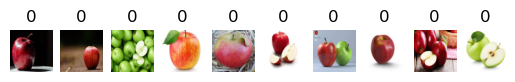

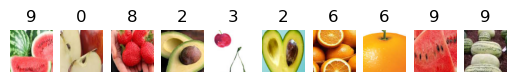

In [19]:

# 이미지 변형 X 확인

for i in range(10):
    plt.subplot(1, 10, i+1) # 1행 10열로 나누고 i+1번째에 그림
    plt.title(none_labels[i].item()) # 라벨을 제목으로 설정
    plt.imshow(none_images[i].permute(1,2,0)) # 이미지를 출력
    plt.axis('off') # 축을 꺼줌
plt.show()

for i in range(10):
    plt.subplot(1, 10, i+1) # 1행 10열로 나누고 i+1번째에 그림
    plt.title(transforms_labels[i].item()) # 라벨을 제목으로 설정
    plt.imshow(transforms_images[i].permute(1,2,0)) # 이미지를 출력
    plt.axis('off') # 축을 꺼줌
plt.show()

In [20]:
def create_loader(transform):
    transforms_dataset=ImageFolder(root='fruit_photos/',
                                      transform=transform) # 이미지 변형
    transforms_loader=DataLoader(transforms_dataset,
                                    batch_size=1000,
                                    shuffle=True,
                                    num_workers=1) # 데이터 로더 생성 
    
    transforms_images, transforms_labels = next(iter(transforms_loader)) # 이미지와 라벨을 가져옴
    return transforms_images, transforms_labels # 이미지와 라벨을 반환

In [21]:
Image_transform=transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ColorJitter(brightness=(0.7, 0.9),
                           contrast=(1,1),
                           saturation=(1,1),
    ),
    transforms.ToTensor()
])
color_tf_images, color_tf_labels = create_loader(Image_transform) # 이미지 색상 변형 


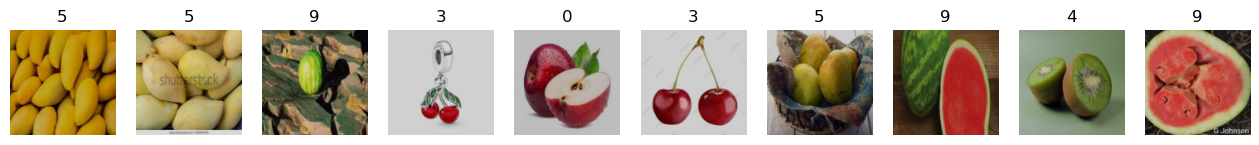

In [22]:
plt.figure(figsize=(16,4)) # 이미지 사이즈 설정
for i in range(10):
    plt.subplot(1,10,i+1) # 1행 10열로 나누고 i+1번째에 그림
    plt.title(color_tf_labels[i].item()) # 라벨을 제목으로 설정
    plt.imshow(color_tf_images[i].permute(1,2,0)) # 이미지를 출력
    plt.axis('off') 
plt.show()

In [23]:
# 이미지 변형 확인

X3=torch.cat([X2, color_tf_images], dim=0) # 원본 이미지와 변형 이미지를 합침
Y3=torch.cat([Y2, color_tf_labels], dim=0) # 원본 라벨과 변형 라벨을 합침
print(X3.size(), Y3.size()) # 이미지와 라벨의 크기

torch.Size([3401, 3, 128, 128]) torch.Size([3401])


In [24]:
# 이미지 좌우 반전
Image_transform=transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor()
])
flip_tf_images, flip_tf_labels = create_loader(Image_transform) # 이미지 좌우 반전
X4=torch.cat([X3, flip_tf_images], dim=0) # 원본 이미지와 변형 이미지를 합침
Y4=torch.cat([Y3, flip_tf_labels], dim=0) # 원본 라벨과 변형 라벨을 합침
print(X4.size(), Y4.size()) # 이미지와 라벨의 크기

torch.Size([4401, 3, 128, 128]) torch.Size([4401])


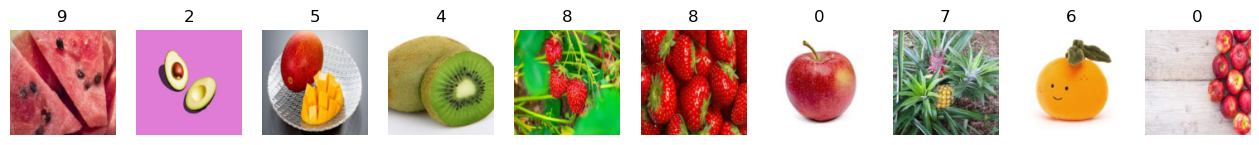

In [25]:
# 위의 과정을 시각화 
plt.figure(figsize=(16,4)) # 이미지 사이즈 설정
for i in range(10):
    plt.subplot(1,10,i+1) # 1행 10열로 나누고 i+1번째에 그림
    plt.title(flip_tf_labels[i].item()) # 라벨을 제목으로 설정
    plt.imshow(flip_tf_images[i].permute(1,2,0)) # 이미지를 출력
    plt.axis('off')
plt.show()

In [26]:

cnt0=(Y4==0).sum() # 라벨이 0인 이미지의 개수
cnt1=(Y4==1).sum() # 라벨이 1인 이미지의 개수
cnt2=(Y4==2).sum() # 라벨이 2인 이미지의 개수
cnt3=(Y4==3).sum() # 라벨이 3인 이미지의 개수
cnt4=(Y4==4).sum() # 라벨이 4인 이미지의 개수
cnt5=(Y4==5).sum() # 라벨이 5인 이미지의 개수
cnt6=(Y4==6).sum() # 라벨이 6인 이미지의 개수
cnt7=(Y4==7).sum() # 라벨이 7인 이미지의 개수
cnt8=(Y4==8).sum() # 라벨이 8인 이미지의 개수
cnt9=(Y4==9).sum() # 라벨이 9인 이미지의 개수
print(cnt0, cnt1, cnt2, cnt3, cnt4, cnt5, cnt6, cnt7, cnt8, cnt9) # 라벨의 개수 출력

tensor(443) tensor(443) tensor(431) tensor(446) tensor(433) tensor(439) tensor(440) tensor(422) tensor(454) tensor(450)


In [27]:
# 훈련 데이터셋과 테스트 데이터셋 분리
X = X4
Y = Y4
ratios = [0.8, 0.2] # 훈련 데이터셋과 테스트 데이터셋의 비율
print(Y.size()) # 라벨의 개수 출력
train_cnt = int(Y.size(0) * ratios[0]) # 훈련 데이터셋의 개수
test_cnt = int(X.size(0) * ratios[1]) # 테스트 데이터셋의 개수
cnts=[train_cnt, test_cnt] # 훈련 데이터셋과 테스트 데이터셋의 개수
print(train_cnt, test_cnt) # 테스트 데이터셋과 훈련 데이터셋의 개수 출력

torch.Size([4401])
3520 880


In [28]:
indices = torch.randperm(X.size(0)) # 인덱스 섞기
print(indices[:10]) # 인덱스 출력 

tensor([ 108, 2853, 3852,  174, 1276, 3944, 3361, 1878,  189, 1707])


In [29]:
x=torch.index_select(X, dim=0, index=indices) # 이미지 섞기
y=torch.index_select(Y, dim=0, index=indices) # 라벨 섞기

x_train=x[:cnts[0]] # 훈련 데이터셋
x_test=x[cnts[0]:] # 테스트 데이터셋
y_train=y[:cnts[0]] # 훈련 데이터셋
y_test=y[cnts[0]:] # 테스트 데이터셋

print(x_train.size(), y_train.size()) # 훈련 데이터셋의 이미지와 라벨의 크기
print(x_test.size(), y_test.size()) # 테스트 데이터셋의 이미지와 라벨의 크기

torch.Size([3520, 3, 128, 128]) torch.Size([3520])
torch.Size([881, 3, 128, 128]) torch.Size([881])


모델 작성 ↓

In [30]:
train_dataset=TensorDataset(x_train, y_train) # tensordataset 사용하여 훈련 데이터셋 생성
test_dataset=TensorDataset(x_test, y_test) 

In [31]:
# 데이터 로더 생성: 모델이 데이터 학습할 수 있도록 데이터 준비 

train_loader=DataLoader(train_dataset,
                        batch_size=100,
                        shuffle=True,
                        drop_last=False)
test_loader=DataLoader(test_dataset)

In [32]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        #conv1 layer
        self.conv1=nn.Conv2d(
            in_channels=3, 
            out_channels=8, 
            kernel_size=3,
            stride=1, 
            padding=1
            )
        
        #conv2 layer
        self.conv2=nn.Conv2d(
            in_channels=8, 
            out_channels=16, 
            kernel_size=3,
            stride=1, 
            padding=1
            )
        
        #conv3 layer
        self.conv3=nn.Conv2d(
            in_channels=16, 
            out_channels=32, 
            kernel_size=3,
            stride=1, 
            padding=1
            )
        
        #conv4 layer
        self.conv4=nn.Conv2d(
            in_channels=32, 
            out_channels=64, 
            kernel_size=3,
            stride=1, 
            padding=1
            )
        
        #conv5 layer
        self.conv5=nn.Conv2d(
            in_channels=64, 
            out_channels=128, 
            kernel_size=3,
            stride=1, 
            padding=1
            )
        
        #max pooling layer
        self.pool=nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1=nn.Linear(128*4*4, 128) # fully connected layer
        self.fc2=nn.Linear(128, 64) 
        self.fc3=nn.Linear(64, 10) # 10개의 클래스로 분류

    def forward(self, x):
        x=self.conv1(x)
        x=torch.relu(x)
        x=self.pool(x)
        x=self.conv2(x)
        x=torch.relu(x)
        x=self.pool(x)
        x=self.conv3(x)
        x=torch.relu(x)
        x=self.pool(x)
        x=self.conv4(x)
        x=torch.relu(x)
        x=self.pool(x)
        x=self.conv5(x)
        x=torch.relu(x)
        x=self.pool(x)

        # 특징 추출
        x=x.view(-1, 128*4*4) # 128*4*4 크기로 변환
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        x=torch.softmax(x, dim=1) # 확률로 변환
        return x
    
        

In [33]:
# 모델 생성
model=CNN().to(device)
print(model)
optimizer=torch.optim.Adam(model.parameters(), lr=0.001) # optimizer 생성
criterion=nn.CrossEntropyLoss()

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [34]:
def train(epoch, model, train_loader, optimizer, interval):
    model.train() # 모델을 학습 모드로 설정

    for batch_index, (image, label) in enumerate(train_loader):
        image=image.to(device) # 이미지를 gpu로 전송
        label=label.to(device)

        optimizer.zero_grad() # optimizer 초기화
        y_hat=model(image) # 모델에 이미지를 넣어 예측
        loss=criterion(y_hat, label) # 예측값과 라벨을 비교하여 loss 계산
        loss.backward() # loss 역전파
        optimizer.step() # optimizer 업데이트

        if batch_index % interval == 0: # interval 마다 출력 
            print('Train Epoch: {}, Train Loss:{}'.format(epoch, loss.item())) # epoch와 loss 출력

In [35]:
# 모델 평가

def evaluate(model, test_loader):
    model.eval() # 모델을 평가 모드로 설정
    test_loss=0 # 테스트 loss 초기화
    correct=0 # 맞은 개수 초기화

    with torch.no_grad(): # 기울기 계산 X
        for image, label in test_loader:
            image=image.to(device)
            label=label.to(device)
            y_hat=model(image) # 모델에 이미지를 넣어 예측
            test_loss+=criterion(y_hat, label).item()
            pred=y_hat.argmax(dim=1) # 확률이 가장 높은 클래스 선택
            correct += (pred==label).sum() 
    
    test_loss = test_loss / len(test_loader.dataset) # 테스트 손실
    test_accuracy = correct/len(test_loader.dataset)*100 # 테스트 정확도
    return test_loss, test_accuracy

# epoch 만큼 학습


In [36]:
import numpy as np
import torch

class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0): # verbose: 출력 여부, delta: 개선이 되었다고 판단하는 최소 변화량
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta  # delta 속성 초기화

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), 'best_model.pt')
        self.val_loss_min = val_loss

In [37]:
def train(model, train_loader, optimizer, interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % interval == 0:
            print(f'Train Epoch: [{batch_idx * len(data)}/{len(train_loader.dataset)}] Loss: {loss.item()}')

In [38]:
early_stopping = EarlyStopping(patience=10, delta=0.01) # early stopping 객체 생성

# epochs 설정
epochs = 200 

# 학습 루프
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, interval=100)  # train 함수에 optimizer 전달
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('epoch: {}, Test Loss: {}, Test Accuracy: {}'.format(epoch, test_loss, test_accuracy))

    early_stopping(test_loss, model)
    if early_stopping.early_stop:
        print('Early stopping')
        break

# 가장 좋은 모델을 불러옴
model.load_state_dict(torch.load('best_model.pt'))

Train Epoch: [0/3520] Loss: 2.302177667617798
epoch: 1, Test Loss: 2.2497868175268443, Test Accuracy: 17.82065773010254
Train Epoch: [0/3520] Loss: 2.2717342376708984
epoch: 2, Test Loss: 2.220679805579169, Test Accuracy: 19.069238662719727
Train Epoch: [0/3520] Loss: 2.151892900466919
epoch: 3, Test Loss: 2.212162450412616, Test Accuracy: 21.679908752441406
EarlyStopping counter: 1 out of 10
Train Epoch: [0/3520] Loss: 2.128095865249634
epoch: 4, Test Loss: 2.2046660423008184, Test Accuracy: 24.40408706665039
Train Epoch: [0/3520] Loss: 2.2038493156433105
epoch: 5, Test Loss: 2.2005901876562164, Test Accuracy: 23.49602699279785
EarlyStopping counter: 1 out of 10
Train Epoch: [0/3520] Loss: 2.1972546577453613
epoch: 6, Test Loss: 2.215713676340058, Test Accuracy: 23.49602699279785
EarlyStopping counter: 2 out of 10
Train Epoch: [0/3520] Loss: 2.249631643295288
epoch: 7, Test Loss: 2.1798250637314243, Test Accuracy: 26.901248931884766
Train Epoch: [0/3520] Loss: 2.204089641571045
epoch:

C:\Users\it\AppData\Local\Temp\ipykernel_21256\3551150376.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pt'))


<All keys matched successfully>

In [39]:
path='model.pt' # 모델 저장 경로
torch.save(model.state_dict(), path) # 모델 저장    

In [40]:
model2 = CNN().to(device) # 모델 생성
model2.load_state_dict(torch.load(path)) # 저장된 모델 불러옴
model2.eval() # 모델을 평가 모드로 설정

C:\Users\it\AppData\Local\Temp\ipykernel_21256\1870279370.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load(path)) # 저장된 모델 불러옴


CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [45]:
predict = model2(x_test[3].to(device)).argmax(dim=1) # 모델에 이미지를 넣어 예측
print(predict.item(), y_test[3].item()) # 예측값과 실제값 출력

9 9


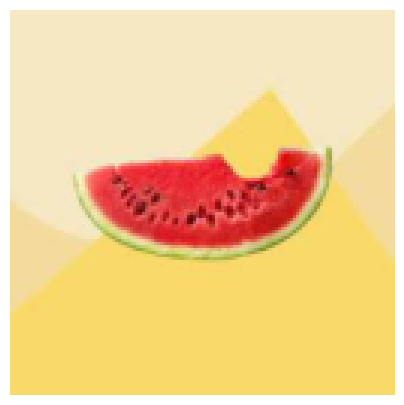

In [47]:
plt.figure(figsize=(5,5)) # 이미지 사이즈 설정
plt.imshow(x_test[3].permute(1,2,0)) # 이미지 출력
plt.axis('off') # 축을 꺼줌
plt.show()